In [2]:
# EDA for Visa Dataset

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
%matplotlib inline

In [4]:
df = pd.read_csv("Visadataset.csv")
#Observation : The dataset is about acceptance or rejection of visa applications with respect to certain features. 

In [5]:
df.head()


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
df.info()

# there are 12 columns/features in total.
# there are 25480 rows/entries.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [7]:
df.dtypes

case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

Checking for null values

In [8]:
df.isnull().sum()

#Observation : The dataset does not have any null values

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

Checking for numerical columns

In [9]:
num_col = [col for col in df.columns if df[col].dtype != "O"]
num_col
#Observation : 3 columns have numerical values 

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

Checking for Non Numeric columns

In [10]:
non_num = [col for col in df.columns if df[col].dtype == "O"]
non_num
#Observation : 9 columns have non numeric values

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

Checking for unique entries

In [11]:
df.nunique()
#Observation There are 25480 unique visa id's

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

In [12]:
#unique continents
df["continent"].unique()
# there are 6 unique continents

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [13]:
#unique educational qualification
df["education_of_employee"].unique()
# there are 4 qualification levels

array(['High School', "Master's", "Bachelor's", 'Doctorate'], dtype=object)

In [14]:
# unique regions of employment
df["region_of_employment"].unique()
#there are 5 unique regions of employment

array(['West', 'Northeast', 'South', 'Midwest', 'Island'], dtype=object)

In [15]:
#number of employees
df["no_of_employees"].unique()
# there are 7105 unique entries for number of employees in the company

array([14513,  2412, 44444, ..., 24335, 48785, 40224])

In [16]:
#unit of wage
df["unit_of_wage"].unique()
#there are 4 methods for paying the employees.

array(['Hour', 'Year', 'Week', 'Month'], dtype=object)

In [17]:
# year of establishment
df["yr_of_estab"].unique()
#there are 199 different years of establishments.

array([2007, 2002, 2008, 1897, 2005, 2012, 1994, 1924, 1995, 2004, 1963,
       2006, 1987, 1991, 2001, 1972, 2013, 1968, 1884, 1981, 1997, 2009,
       1998, 1880, 2000, 2010, 1965, 1909, 2011, 1989, 1933, 1960, 2003,
       1976, 1996, 1847, 1935, 1890, 1999, 1838, 1947, 1939, 1970, 1977,
       1982, 1943, 1956, 1864, 1974, 1985, 1984, 1971, 1913, 1969, 1818,
       1839, 1914, 1988, 1944, 1855, 1975, 1966, 1801, 1920, 1925, 1993,
       1992, 1979, 1986, 1931, 1962, 1954, 1868, 1859, 1946, 1950, 1869,
       1917, 2014, 1980, 1896, 1949, 1843, 1850, 1906, 1961, 1951, 1958,
       1912, 1983, 1948, 1945, 1978, 1898, 1923, 1911, 1851, 1865, 1849,
       1872, 1967, 1926, 1873, 1848, 2015, 1889, 1876, 1852, 1938, 1973,
       1959, 1927, 1990, 1930, 1922, 1940, 1878, 1934, 1834, 1928, 1800,
       1861, 1952, 1846, 1885, 1907, 1817, 1841, 1821, 1953, 1888, 1916,
       1886, 2016, 1932, 1915, 1937, 1866, 1919, 1921, 1910, 1854, 1875,
       1904, 1879, 1942, 1964, 1899, 1900, 1837, 18

Statistical Analysis

No missing data so the step for filling data is not needed.

Finding various statistical values for numerical columns

In [18]:
#creating num_col into data frame
data = df[num_col]
data

,no_of_employees,yr_of_estab,prevailing_wage
0,14513,2007,592.2029
1,2412,2002,83425.6500
2,44444,2008,122996.8600
3,98,1897,83434.0300
4,1082,2005,149907.3900
...,...,...,...
25475,2601,2008,77092.5700
25476,3274,2006,279174.7900
25477,1121,1910,146298.8500
25478,1918,1887,86154.7700


Finding average number of employees

In [19]:
pd.DataFrame(data["no_of_employees"]).mean()
#Observation Average number of employees is approximately 5667

no_of_employees    5667.04321
dtype: float64

Finding mode of Year of Establishment

In [20]:
pd.DataFrame(data["yr_of_estab"]).mode()
#Observation This concludes that maximum companies included in given data were established in 1998

,yr_of_estab
0,1998


Education of Employee

In [21]:
df[["education_of_employee"]].mode()

#Observation Maximum number of applicants have Bachelor's Degree

,education_of_employee
0,Bachelor's


Continent

In [22]:
df[["continent"]].mode()
#Observation :Majority of applicants are from Asia Continent

,continent
0,Asia


Job Experience

In [23]:
df[["has_job_experience"]].mode()
#Observation : Majority of applicants have job Experience

,has_job_experience
0,Y


Region of Employement

In [24]:
df[["region_of_employment"]].mode()
#Observation : Majority of applicants getting employed in North East Region

,region_of_employment
0,Northeast


Requires Job Training

In [25]:
df[["requires_job_training"]].mode()
#Observation :Most of the employees do not need training 

,requires_job_training
0,N


## **Graphs**

Categorical Features 

Number of Applicants and Continent

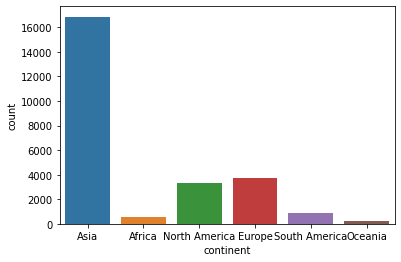

In [26]:
sb.countplot(x = df["continent"])
#observation : Highest number of applications are received from Asia

Education Count plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


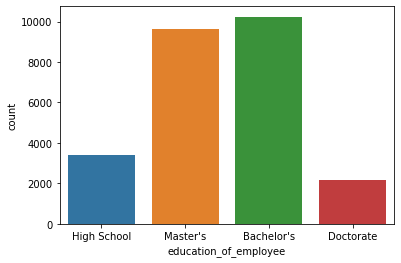

In [27]:
sb.countplot(df["education_of_employee"])
#Observation : Majority of applicants have Bachelor's Degree

Has job Experience Count plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


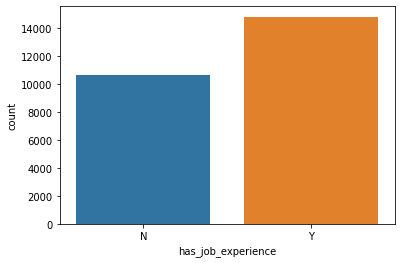

In [28]:
sb.countplot(df["has_job_experience"])
#Observation : Majority of applicants have job Experience

Year of establishment

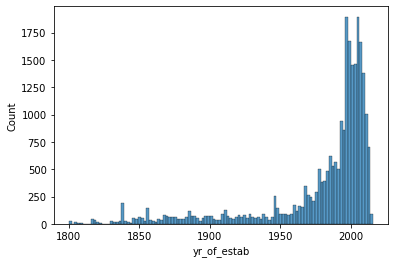

In [29]:
sb.histplot(df["yr_of_estab"])
#Many companies were established in late 20th century 

Region of employment Count Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


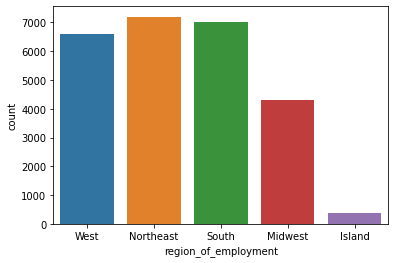

In [30]:
sb.countplot(df["region_of_employment"])

Bivariate Analysis

In [80]:
px.histogram(df["no_of_employees"],x = df["region_of_employment"])
# Number of employees is maximum for islands

In [81]:
px.scatter(x = df["region_of_employment"],y = df["yr_of_estab"])
#Few companies were started on islands in 1st half of 19th century. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


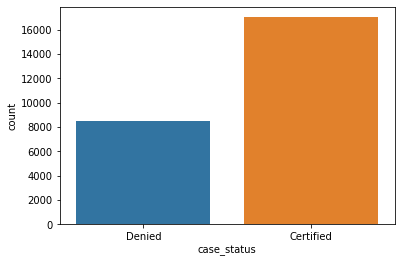

In [33]:
sb.countplot(df["case_status"])

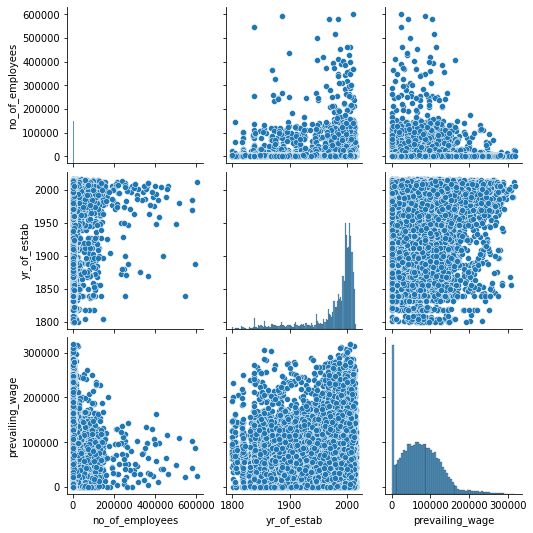

In [36]:
sb.pairplot(df)

Multivariate Analysis

In [47]:
px.scatter(x = df["prevailing_wage"],y = df["no_of_employees"],color = df["continent"])

#actually this comparison is not relevant as the prevailing wage is in different units

In [74]:
px.scatter(df["case_status"],color = df["continent"])

#Observation Gives case_status continent wise (zot clear but if zoomed then it will be)

In [76]:
px.histogram(x = df["prevailing_wage"],color = df["continent"])

In [84]:
fig = px.pie(df, names=df['continent'])
fig.show()

In [85]:
fig1 = px.pie(df, names=df['full_time_position'])
fig1.show()